<a href="https://colab.research.google.com/github/asu2304/Generative_Adversarial_Network-GAN-/blob/main/GAN(Generative_Adverserial_Networks).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generative Adverserial Networks(GAN's)

In [1]:
# this is to bring the tensorflow locally

# import tensorflow as tf
# gpus = tf.config.experimental.list_physical_device('GPU')
# for gpu in gpus:
#   tf.config.experimental.set_memory_growth(gpu, True)
#   print(gpu)

In [ ]:
!pip install tensorflow_datasets

In [3]:
#  for the data
import tensorflow_datasets as tfds
# for visulization
from matplotlib import pyplot as plt


In [4]:
# used tensorflow dataset to load the data
ds = tfds.load('fashion_mnist', split = 'train')


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteI0XKO3/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteI0XKO3/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [5]:
ds.as_numpy_iterator().next() # this is dictionary containing image and their lables
ds.as_numpy_iterator().next().keys() # let's see the keys of the dictionary

dict_keys(['image', 'label'])

In [6]:
ds.as_numpy_iterator().next()['label']

2

## Data Visualization and Build Datasets

In [7]:
# to do some data transformation

In [8]:
import numpy as np

In [9]:
# setting up connection aka iterator
dataiterator = ds.as_numpy_iterator()

In [10]:
dataiterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 18],
         [ 77],
         [227],
         [227],
         [208],
         [210],
         [225],
         [216],
         [ 85],
         [ 32],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 61],
         [100],
         [ 97],
         [ 80],
         [ 57],
         [117],
         [227],
         [238],
         [115],
         [ 49],
         [ 78],
         [106],
         [108],
         [ 71],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

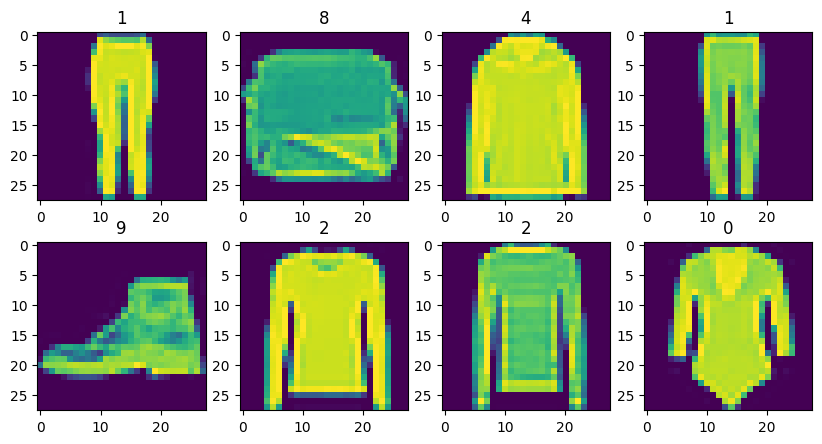

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# getting data out of the pipeline
fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(10, 5))
for idx in range(8):  # Adjusted to 16 to match 4x4 grid
    sample = dataiterator.next()
    ax[idx // 4, idx % 4].imshow(np.squeeze(sample['image']))  # Corrected the indexing to access the subplot
    ax[idx // 4, idx % 4].set_title(sample['label'])  # Corrected the method name to set_title

plt.show()


In [12]:
ax

array([[<Axes: title={'center': '1'}>, <Axes: title={'center': '8'}>,
        <Axes: title={'center': '4'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '9'}>, <Axes: title={'center': '2'}>,
        <Axes: title={'center': '2'}>, <Axes: title={'center': '0'}>]],
      dtype=object)

In [13]:
np.squeeze(dataiterator.next()['image']).shape

(28, 28)

## scaling - nn's performs a little better and fast too

In [14]:
def scale_images(data):
  image = data['image']
  return image / 255

**Steps to build data pipelines**

1.   cahce
2.   shuffle
3.   batch
4.   prefetch


In [15]:
# reloading the dataset
ds = tfds.load("fashion_mnist", split = 'train')
ds = ds.map(scale_images)
ds = ds.cache()
ds = ds.shuffle(60000)
ds = ds.batch(128)
ds = ds.prefetch(64)

In [16]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

## Building the neural networks

### Importing modeling components

In [ ]:
!pip install tensorflow

In [18]:
# we will use Sequenctial api
from tensorflow.keras.models import Sequential
# bring in the layers for the neural networks
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

## Buiding Generator

In [19]:
def build_generator():

  # using the sequential api
  model = Sequential()

  # takes in random value and reshape it as 7*7*128
  model.add(Dense(7*7*128, input_dim = 128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7, 7, 128)))

  # upsampling block 1
  model.add(UpSampling2D())
  model.add(Conv2D(128, 5, padding = 'same'))
  model.add(LeakyReLU(0.2))

  # upsampling block 1
  model.add(UpSampling2D())
  model.add(Conv2D(128, 5, padding = 'same'))
  model.add(LeakyReLU(0.2))

  # convlolution block
  model.add(Conv2D(128, 4, padding = 'same'))
  model.add(LeakyReLU(0.2))

  # convlolution block
  model.add(Conv2D(128, 4, padding = 'same'))
  model.add(LeakyReLU(0.2))

  # conv layer to get to one channel
  model.add(Conv2D(1, 4, padding = 'same', activation = 'sigmoid'))
  model.add(LeakyReLU(0.2))

  return model

In [20]:
test_model = build_generator()


In [21]:
test_model.summary() # don't get why parameters in second convolutoin layer is that high!

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              809088    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d (UpSampling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 14, 14, 128)       0         
                                                        

### Testing the generator

In [22]:
# let's test the genrator model - it should generate random images
generator = build_generator()


In [23]:
img = generator.predict(np.random.randn(4, 128, 1))
# img

1/1 [==============================] - 7s 7s/step


array([[[[0.49679983],
         [0.4991972 ],
         [0.49466848],
         ...,
         [0.50230384],
         [0.5030855 ],
         [0.5024247 ]],

        [[0.49556458],
         [0.50233465],
         [0.5023502 ],
         ...,
         [0.49991965],
         [0.49760836],
         [0.50077087]],

        [[0.48921084],
         [0.49923632],
         [0.5010962 ],
         ...,
         [0.5004452 ],
         [0.49746487],
         [0.5012093 ]],

        ...,

        [[0.49767992],
         [0.49631834],
         [0.49787486],
         ...,
         [0.510721  ],
         [0.5054623 ],
         [0.50145215]],

        [[0.49848303],
         [0.5001372 ],
         [0.4987778 ],
         ...,
         [0.50587785],
         [0.5022043 ],
         [0.5009529 ]],

        [[0.5048815 ],
         [0.5063331 ],
         [0.5065571 ],
         ...,
         [0.5059942 ],
         [0.50119   ],
         [0.5000802 ]]],


       [[[0.49363023],
         [0.4944302 ],
         [0.49

In [24]:
img.shape

(4, 28, 28, 1)

1/1 [==============================] - 0s 21ms/step


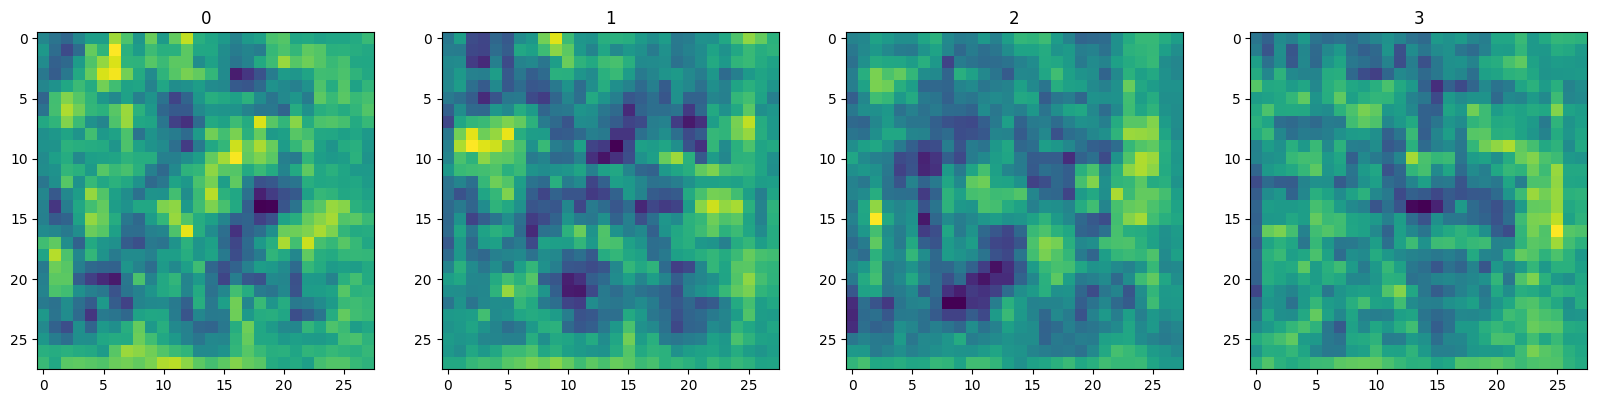

In [25]:
# to generate different images everytime
img = generator.predict(np.random.randn(4, 128, 1))
fig, ax = plt.subplots(ncols = 4, figsize = (20, 20))
for idx, img in enumerate(img):

  ax[idx].imshow(np.squeeze(img))
  ax[idx].title.set_text(idx)

## Building Discriminator

In [26]:
def build_discriminator():
  model = Sequential()

  # first conv block
  model.add(Conv2D(32, 5, input_shape = (28, 28, 1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # second convolution block
  model.add(Conv2D(64, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # third conv block
  model.add(Conv2D(128, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # fourth conv layer
  model.add(Conv2D(256, 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))

  # Flatten then pass to dense layer
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1, activation = 'sigmoid'))

  return model

In [27]:
discriminator = build_discriminator()

In [28]:
discriminator.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 24, 24, 32)        0         
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                                 
 dropout_1 (Dropout)         (None, 20, 20, 64)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 16, 16, 128)      

### Testing out the discriminator

In [29]:
# discriminator.predict(img)  # it will produce error because image isn't in the correct shape to be p
# assed we've to exand dimenstion to get result for such input by passing np.expand_dims(img,0)

# discriminator.predict(np.expand_dims(img,0))

In [30]:
img = generator.predict(np.random.randn(4, 128, 1))
discriminator.predict(img)

1/1 [==============================] - 0s 189ms/step


array([[0.50642365],
       [0.5063865 ],
       [0.50644857],
       [0.50655454]], dtype=float32)

## Creating Custom Training Loop


### Settign up the losses and optimizers

In [31]:
# let's take Adam as the optimizer and as BinaryCrossentropy as the loss
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [32]:
# we would need ajust these learning rates once again!
g_opt = Adam(learning_rate = 0.0001)
d_opt = Adam(learning_rate = 0.00001)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

### Building a subclass model

In [33]:
from tensorflow.keras.models import Model
import tensorflow as tf


In [43]:
class FashionGAN(Model):
    def __init__(self, generator, discriminator, *args, **kwargs):
        # Pass through args and kwargs to base class
        super().__init__(*args, **kwargs)

        # Create attributes for gen and disc
        self.generator = generator
        self.discriminator = discriminator

    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs):
        # Compile with base class
        super().compile(*args, **kwargs)

        # Create attributes for losses and optimizers
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss

    def train_step(self, batch):
        # Get the data
        real_images = batch
        fake_images = self.generator(tf.random.normal((128, 128, 1)), training=False)

        # Train the discriminator
        with tf.GradientTape() as d_tape:
            # Pass the real and fake images to the discriminator model
            yhat_real = self.discriminator(real_images, training=True)
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)

            # Create labels for real and fakes images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)

            # Add some noise to the TRUE outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)

            # Calculate loss - BINARYCROSS
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)

        # Apply backpropagation - nn learn
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))

        # Train the generator
        with tf.GradientTape() as g_tape:
            # Generate some new images
            gen_images = self.generator(tf.random.normal((128,128,1)), training=True)

            # Create the predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)

            # Calculate loss - trick to training to fake out the discriminator
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels)

        # Apply backprop
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))

        return {"d_loss":total_d_loss, "g_loss":total_g_loss}

In [44]:
# creating the instance
fashgan = FashionGAN(generator, discriminator)

In [45]:
# compiling the model
fashgan.compile(g_opt, d_opt, g_loss, d_loss)

### Building Callback

In [46]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [47]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        # for i in range(self.num_img):
        #     img = array_to_img(generated_images[i])
        #     img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))

## Training the model

In [39]:
# ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [49]:
# Recommend 2000 epochs


# training it for just 20 epochs
hist = fashgan.fit(ds, epochs=20, callbacks=[ModelMonitor()])



training the model for 2000 epochs would take significantly longer.


## Testing out the generator

In [64]:
# import tensorflow as tf
from tensorflow.keras.models import load_model

model = load_model('/content/generatormodel.h5')
model.summary()


Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_105 (Dense)           (None, 256, 256)          512       
                                                                 
 dense_106 (Dense)           (None, 256, 512)          131584    
                                                                 
 dense_107 (Dense)           (None, 256, 256)          131328    
                                                                 
 reshape_14 (Reshape)        (None, 8, 8, 1024)        0         
                                                                 
 conv2d_transpose_42 (Conv2D  (None, 19, 19, 64)       1638464   
 Transpose)                                                      
                                                                 
 conv2d_transpose_43 (Conv2D  (None, 24, 24, 32)       73760     
 Transpose)                                          

In [66]:
imgs = generator.predict(tf.random.normal((16, 128, 1)))

1/1 [==============================] - 0s 31ms/step


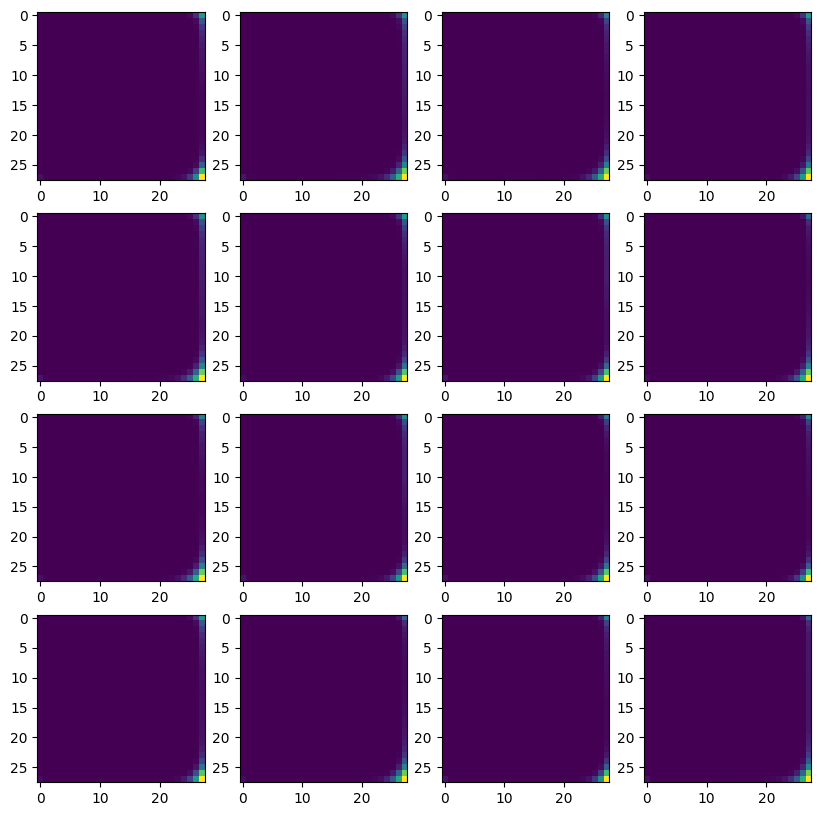

In [68]:
fig, ax = plt.subplots(ncols = 4, nrows = 4, figsize = (10,10))
for row in range(4):
  for col in range(4):
    ax[row][col].imshow(imgs[(row+1)*(col+1)-1])

the output arent looking great beacuse i've only trained it for only 20 epochs. i recommend training it for atlest 1500+ epochs to see the results comming.

if you train more the model would learn more you can go upto 2000 even to see great results

## Saving the model

In [ ]:
generator.save('generator.h5')
disciminator.save('discriminator.h5')